In this iPython notebook, we will featurize MOR ligand binding simulation by pairwise distances between the ligand and different receptor residues. We will then perform tICA and prospectively build an MSM. 

In [1]:
from PDB_Order_Fixer import PDB_Order_Fixer
import mdtraj as md
import os
import numpy as np
import h5py

import datetime
import glob
import copy
from functools import partial 
import operator
import time

import random 
import subprocess
from subprocess import Popen
import sys
from io_functions import *
from custom_clusterer import *
from custom_tica import *
from custom_featurizer import *
from pdb_editing import *
from analysis import *
from io_functions import *
#from topology_fixing import *
from subsampling import *
from conversions import *
from custom_msm import *
from grids import *
from docking_analysis import *

Couldn't import dot_parser, loading of dot files will not be possible.


/home/enf/software/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
from detect_intermediates import *
from interpret_tICs import *

we are operating on biox3


In [3]:
from b2ar_feature_types import *
from get_variable_names import *
from b2ar_tica_config import *
from residue import Residue, Atom

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

#set_palette('Set1', n_colors=15, desat=None)

In [5]:
ori_feature_name = copy.deepcopy(feature_name)

In [6]:
#schemes = ["closest-heavy", "CA"]
#feature_name = "%s-CA" %ori_feature_name

In [7]:
rho = 0.01
rho_string = "_rho0pt01"

In [8]:
(active_ref_dir, inactive_ref_dir, simulation_ref_dir, scripts_dir,
          ligand_dir, agonist_dir, inverse_agonist_dir, biased_agonist_dir, ref_receptors_dir, whole_trajectory_pnas,
          sasa_file) = get_base_files(base)

tica_dir = get_tica_dir(base, is_sparse, lag_time, n_components, feature_name, 
                                 wolf_string, shrinkage_string, rho_string)
ori_tica_dir = copy.deepcopy(tica_dir)
features_dir = get_features_dir(base, feature_name)

landmarks_dir = get_landmarks_dir(tica_dir)
analysis_dir = get_analysis_dir(tica_dir, n_clusters, sampling_method)
gmm_dir = get_gmm_dir(tica_dir)
rf_dirdir = get_rf_dir(tica_dir)


ref_tica_dir, ref_tica_coords = get_ref_tica_dirs(tica_dir)

graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)

pnas_titles =  ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]
pnas_features_dir = analysis_dir


(clusterer_dir, msm_model_dir, macrostate_dir, features_known, model_dir, projected_features_dir,
         projection_operator_dir, ktica_fit_model_filename, ktica_projected_data_filename, nystroem_data_filename,
         mutual_information_csv, pearson_csv) = get_tica_files(base, tica_dir, n_clusters, msm_lag_time, n_macrostates)

(standardized_features_dir, feature_residues_csv, feature_residues_pkl,
          contact_csv, ref_features_dir) = get_feature_files(features_dir)

(kmeans_csv, tica_coords_csv, features_csv, active_rmsd_dir, inactive_rmsd_dir, active_pnas_dir, inactive_pnas_joined, active_pnas_joined,
        clusters_map_file, ktica_clusters_map_file, analysis_file, combined_file, docking_summary, docking_joined, docking_z_scores_csv,
        aggregate_docking, aggregate_docking_joined, docking_pnas_joined, aggregate_docking_pnas, aggregate_docking_pnas_joined, docking_multiple_ligands,
        docking_distances_file, docking_pdf, mmgbsa_docking_distances, pnas_coords, mmgbsa_dir, mmgbsa_csv, mmgbsa_pdf, aggregate_mmgbsa,
        aggregate_mmgbsa_joined, aggregate_mmgbsa_pnas_joined, mmgbsa_z_scores_csv, active_clusters_csv, intermediate_clusters_csv,
        inactive_clusters_csv, pnas_clusters_averages, tica_clusters_averages, tica_classes_csv, tica_samples_csv, subgraph_save_base,
        degree_save_base, degree_map_csv, degree_z_map_csv, aggregate_docking_pnas_degree_z_joined, tic_residue_csv, feature_coefs_csv,
        duplicated_feature_coefs_csv) = get_analysis_files(analysis_dir, n_clusters, tica_dir, tica_dir, sampling_method, n_samples, precision,
                                                           msm_lag_time)

(inactive_pnas_distances_dir, active_pnas_distances_dir, active_pnas_all_distances_dir,
          inactive_pnas_distances_new_csv, active_pnas_distances_new_csv, active_pnas_joined, active_pnas_means, pnas_coords_dir,
          pnas_coords_csv, pnas_all_coords_csv, pnas_coords_hexbin_dir, pnas_coords_co_crystallized_docking_dir,
          pnas_coords_active_colors_dir, user_defined_features_file, reaction_coordinates_trajs_file) = get_pnas_files(whole_trajectory_pnas, pnas_features_dir)

features_dir = get_features_dir(base, feature_name)



graph_file = get_graph_file(tica_dir, msm_lag_time, n_clusters)
(scripts_dir, pymol_fixpdb_dir) = get_script_dir(scripts_dir)
(save_dir, reimaged_dir, mae_dir, combined_reimaged_dir, grid_dir, docking_dir) = get_docking_dirs(tica_dir, n_clusters, n_components, n_samples, sampling_method, precision)


/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A
/home/enf/b2ar_analysis/featuresall_residues_2rh1_3sn6_under_cutoff6A


In [9]:
tica_dir

'/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01'

In [10]:
cutoff

0.66

In [57]:
schemes

['closest-heavy', 'CA']

In [51]:
contact_residues

[ASP29,
 GLU30,
 VAL31,
 TRP32,
 VAL33,
 VAL34,
 GLY35,
 MET36,
 GLY37,
 ILE38,
 VAL39,
 MET40,
 SER41,
 LEU42,
 ILE43,
 VAL44,
 LEU45,
 ALA46,
 ILE47,
 VAL48,
 PHE49,
 GLY50,
 ASN51,
 VAL52,
 LEU53,
 VAL54,
 ILE55,
 THR56,
 ALA57,
 ILE58,
 ALA59,
 LYS60,
 PHE61,
 GLU62,
 ARG63,
 LEU64,
 GLN65,
 THR66,
 VAL67,
 THR68,
 ASN69,
 TYR70,
 PHE71,
 ILE72,
 THR73,
 SER74,
 LEU75,
 ALA76,
 CYS77,
 ALA78,
 ASP79,
 LEU80,
 VAL81,
 MET82,
 GLY83,
 LEU84,
 ALA85,
 VAL86,
 VAL87,
 PRO88,
 PHE89,
 GLY90,
 ALA91,
 ALA92,
 HIS93,
 ILE94,
 LEU95,
 MET96,
 LYS97,
 MET98,
 TRP99,
 THR100,
 PHE101,
 GLY102,
 ASN103,
 PHE104,
 TRP105,
 CYS106,
 GLU107,
 PHE108,
 TRP109,
 THR110,
 SER111,
 ILE112,
 ASP113,
 VAL114,
 LEU115,
 CYS116,
 VAL117,
 THR118,
 ALA119,
 SER120,
 ILE121,
 GLU122,
 THR123,
 LEU124,
 CYS125,
 VAL126,
 ILE127,
 ALA128,
 VAL129,
 ASP130,
 ARG131,
 TYR132,
 PHE133,
 ALA134,
 ILE135,
 THR136,
 SER137,
 PRO138,
 PHE139,
 LYS140,
 TYR141,
 GLN142,
 SER143,
 LEU144,
 LEU145,
 THR146,
 LYS147,


In [ ]:
if not os.path.exists(features_dir): os.makedirs(features_dir)
import custom_featurizer
reload(custom_featurizer)
from custom_featurizer import *
featurize_contacts_custom(traj_dir, features_dir = features_dir, 
                          traj_ext = traj_ext, contact_residue_pairs_file = feature_residues_pkl, 
                          structures = [active_ref_dir, inactive_ref_dir], dihedral_residues =  [], 
                          dihedral_types = ["phi", "psi", "chi1", "chi2"], 
                          contact_residues =  contact_residues, residues_map = None, 
                          contact_cutoff = cutoff, parallel = False, 
                          exacycle = exacycle, load_from_file=False, schemes=schemes)


In [ ]:
fit_and_transform(features_directory = features_dir, model_dir = tica_dir, stride=5, lag_time = lag_time, n_components = n_components, sparse = sparse, wolf = wolf, rho = rho, shrinkage = shrinkage, parallel=True, traj_ext = traj_ext, normalize=True)

In [8]:
tica_object = verboseload(projection_operator_dir)
print(tica_object.timescales_)

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_tica_coords.h5"...
[ 608.76369352  342.82218117  245.50411087  215.63066628  154.69677355
  155.50637752  129.76331383  104.55745741  105.81972363  128.19281613
   98.09798731   77.75059767   72.03939041   63.51776034   65.46962409
   56.51628841   56.55764827   70.05206467   62.57206504   45.93474676
   46.11822305   41.0391746    44.00544067   37.35108      38.67501459]


In [59]:
tic_components_dir = tica_dir
important_contact_features = interpret_tIC_components(projection_operator_dir, tic_components_dir, feature_residues_pkl, n_tica_components=n_components, percentile=95)

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A-CA_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_tica_coords.h5"...
Interpreting tIC 1
feature_importances_df.shape
(4, 7)
residue_importances_df.shape
(7, 3)
          feature_name      res_i      res_j  resid_i  resid_j  importance  \
3  Phe104_Ca-Gln170_Ca  Phe104_Ca  Gln170_Ca      104      170    0.295031   
1         Asp79-Tyr326      Asp79     Tyr326       79      326    0.188006   
0         Asp79-Asn318      Asp79     Asn318       79      318    0.173521   
2   Gly50_Ca-Pro323_Ca   Gly50_Ca  Pro323_Ca       50      323    0.169860   

                  feature  
3  [PHE104_CA, GLN170_CA]  
1         [ASP79, TYR326]  
0         [ASP79, ASN318]  
2   [GLY50_CA, PRO323_CA]  
             residue  importance  resid
Gln170_Ca  Gln170_Ca    0.295031    170
Phe104_Ca  Phe104_Ca    0.295031    104
Tyr326        Tyr326    0.188006    326
Asp79          Asp79    0.187281

In [26]:
tica_coords = verboseload(projected_features_dir)
pnas_coords = verboseload(pnas_coords_dir)
for pnas_coord in pnas_coords: pnas_coord[:,0]*=7.14
tica_names = ["tIC.%d" %i for i in range(1,n_components+1)]
pnas_names = ["tm6_tm3_dist", "rmsd_npxxy_inactive", "rmsd_npxxy_active", "rmsd_connector_inactive", "rmsd_connector_active"]

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_projected.h5"...
loading "/home/enf/b2ar_analysis/all_pnas_features/pnas_coords.h5"...


In [27]:
def calculate_cluster_averages_per_feature(clusterer, features):
  n_clusters = clusterer.n_clusters 
  concatenated_clusters = np.concatenate(clusterer.labels_)
  concatenated_features = np.concatenate(features)
  cluster_averages = np.zeros((n_clusters, concatenated_features.shape[1]))
  for i in range(0, n_clusters):
    rows = np.where(concatenated_clusters == i)[0]
    means = np.mean(concatenated_features[rows,:], axis=0)
    cluster_averages[i,:] = means
  return cluster_averages

In [28]:
clusterer = verboseload(clusterer_dir)
cluster_averages = calculate_cluster_averages_per_feature(clusterer, pnas_coords)

loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_1000clusters.h5"...


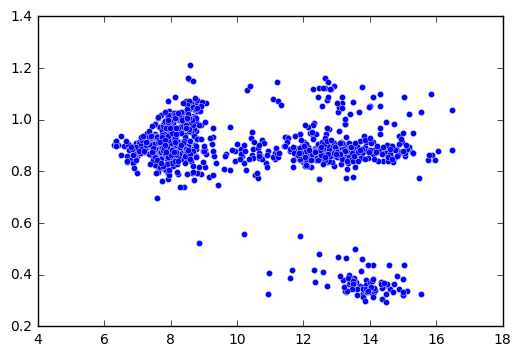

In [29]:
plt.scatter(cluster_averages[:,0], cluster_averages[:,2])

In [15]:
cluster_averages = pd.DataFrame(cluster_averages, columns=pnas_names)
active_clusters = cluster_averages.loc[(cluster_averages["rmsd_npxxy_active"] < 0.5) & (cluster_averages["tm6_tm3_dist"] > 12.) & (cluster_averages["tm6_tm3_dist"] < 15.)]
inactive_clusters = cluster_averages.loc[(cluster_averages["rmsd_npxxy_active"] > 0.5) & (cluster_averages["tm6_tm3_dist"] <10.)]

In [16]:
active_clusters

tm6_tm3_dist  rmsd_npxxy_inactive  rmsd_npxxy_active  \
6       14.070836             1.018938           0.377357   
15      13.697493             1.053278           0.356238   
22      14.426732             1.046531           0.356615   
35      12.320419             1.142434           0.416908   
73      14.335858             1.073100           0.372462   
78      13.873279             1.179568           0.377985   
89      12.477614             0.953105           0.479240   
106     13.805037             1.054689           0.331172   
109     13.743991             0.973036           0.416502   
125     14.368614             1.102396           0.307151   
138     13.799865             1.006472           0.352945   
147     13.366959             0.992998           0.365383   
148     14.596549             1.067478           0.345856   
169     13.412430             1.053128           0.370772   
179     13.893491             1.104017           0.360646   
206     14.050921             1.035922           0.327668   
217     13.200382             1.001132           0.378300   
221     13.803206             1.147025           0.313080   
224     14.082224             1.072459           0.437663   
235     13.276909             1.060387           0.333755   
273     14.524870             1.044988           0.362650   
280     13.596169             1.196562           0.372128   
291     14.353667             1.061762           0.350661   
298     14.994867             1.054813           0.321643   
310     14.484280             1.043237           0.325841   
313     14.002897             1.031043           0.370210   
318     14.341414             1.030620           0.362718   
339     13.838042             1.025692           0.340895   
349     13.939886             1.040904           0.436755   
375     13.535308             1.039452           0.373236   
..            ...                  ...                ...   
615     13.873000             1.060602           0.344897   
649     13.502663             0.966437           0.375406   
655     12.589210             0.977430           0.411037   
658     13.901171             1.021202           0.333198   
704     13.492543             1.034479           0.362564   
727     12.721770             1.023329           0.356504   
765     14.868554             1.083359           0.344847   
773     14.115255             1.058511           0.334687   
786     13.044726             0.994435           0.470053   
803     13.612131             1.222358           0.346471   
804     14.091328             1.050793           0.383984   
816     12.346225             1.001025           0.370851   
845     13.472125             1.190879           0.344540   
846     14.017294             1.185111           0.349759   
849     14.586618             0.977527           0.435977   
876     14.690791             1.027622           0.332144   
880     13.845449             1.098857           0.300284   
883     13.541667             0.986701           0.498925   
893     14.098766             1.069052           0.313646   
895     14.159836             1.022812           0.340038   
915     13.317685             1.101264           0.336082   
921     14.133118             1.082006           0.349330   
930     13.612683             1.065155           0.321560   
943     14.028954             1.073330           0.353291   
944     14.427672             1.052269           0.367861   
947     13.956685             1.041019           0.339037   
958     14.987868             1.025829           0.333444   
969     14.486148             1.083688           0.294148   
970     13.774655             0.921918           0.460450   
994     13.236410             0.981930           0.352584   

     rmsd_connector_inactive  rmsd_connector_active  
6                   0.685398               1.209663  
15                  1.727751               0.842566  
22                  1.158779               1.022419  
35    

In [61]:
import plots
reload(plots)
from plots import *

In [ ]:
plot_data_vs_data(np.concatenate(tica_coords), np.concatenate(pnas_coords), tica_names, pnas_names, analysis_dir)

In [ ]:
analysis_dir

In [ ]:
plot_columns(tica_dir, projected_features_dir, titles = ["tIC%d" %j for j in range(1,11)], tICA = True, scale = 1.0, refcoords_file = None)

In [ ]:
get_ligands(agonist_dir)

In [ ]:
get_ligands(biased_agonist_dir)

In [ ]:
docking_multiple_ligands

In [35]:
from ipyparallel import Client
rc = Client()
print(len(rc.ids))
dview = rc[:]
dview.map(os.chdir, ['/home/enf/b2ar_analysis/conformation']*len(rc.ids))



230


<AsyncMapResult: chdir>

In [ ]:

indices = [0,1000]
chosen_receptors = []
for i in range(indices[0], indices[1]):
  for j in range(0, n_samples):
    chosen_receptors.append("cluster%d_sample%d" %(i, j))

biased_ligands = get_ligands(biased_agonist_dir)
print("biased_ligands")
print(biased_ligands)
reimaged_dir = save_dir
mae_dir = reimaged_dir
remove_ter(reimaged_dir)
reorder(reimaged_dir)

inverse_ligands = get_ligands(inverse_agonist_dir)
agonist_ligands = get_ligands(agonist_dir)

agonist_ligands = [a for a in agonist_ligands if "TA" not in a]

pprep(mae_dir, ref = active_ref_dir, chosen_receptors = chosen_receptors, worker_pool=dview)
generate_grids(mae_dir, grid_center, grid_dir, remove_lig = "BIA", chosen_receptors = chosen_receptors, worker_pool=dview)


dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)

dock_ligands_and_receptors(grid_dir, docking_dir,  biased_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = biased_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)



In [ ]:

analyze_docking_results_multiple(docking_dir, precision = "SP", ligands = biased_ligands + agonist_ligands, summary = docking_multiple_ligands, redo = True)
compute_cluster_averages(None, csv_filename=docking_multiple_ligands, save_csv=aggregate_docking)

#compute_aggregate_scores(docking_multiple_ligands, inverse_agonists = inverse_ligands, summary = aggregate_docking, z_scores_csv = docking_z_scores_csv)
#aggregate_docking_joined_map = convert_csv_to_joined_map(aggregate_docking, aggregate_docking_joined)[0]
#aggregate_docking_means = calc_mean(aggregate_docking_joined_map)
#write_map_to_csv(aggregate_docking_joined, aggregate_docking_means, ["cluster", "mean_aggregate_docking_z_score"])
#r['do.analysis'](tica_dir, analysis_dir, pnas_coords_csv, tica_coords_csv, features_dir, docking_multiple_ligands)
tics_vs_docking_file = "%s/tICA_vs_docking.pdf" % analysis_dir
plot_tICs_vs_docking(docking_multiple_ligands, tica_coords_csv, tics_vs_docking_file, chosen_ligand="s-carvedilol")


In [ ]:
plot_timescales(clusterer_dir, n_clusters, tica_dir, list(range(1,25)))


In [9]:
lag_time = 10
msm_model_dir = "%s/msm_lag_time%d.h5" % (tica_dir, lag_time)
build_msm(clusterer_dir, lag_time=lag_time, msm_model_dir=msm_model_dir)


loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_1000clusters.h5"...
fitting msm to trajectories with 1000 clusters and lag_time 10
MSM contains 2 strongly connected components above weight=0.10. Component 1 selected, with population 99.527749%
MarkovStateModel(ergodic_cutoff='on', lag_time=10, n_timescales=None,
         prior_counts=0.0, reversible_type='mle', sliding_window=True,
         verbose=True)
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/msm_lag_time10.h5"... (<class 'msmbuilder.msm.msm.MarkovStateModel'>)
fitted msm to trajectories with 981 states


MarkovStateModel(ergodic_cutoff='on', lag_time=10, n_timescales=None,
         prior_counts=0.0, reversible_type='mle', sliding_window=True,
         verbose=True)

In [29]:
n_clusters = 100
n_samples=25

clusterer_tICs_1_2_3_filename = "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples.h5" %(tica_dir, n_clusters, n_samples)
clusterer_tICs_1_2_3_map_file = "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_map.json" %(tica_dir, n_clusters, n_samples)
tics_to_cluster = [0, 1, 2]

projected_features_tICs_1_2_3_filename = "%s/projected_features_tICs_1_2_3.h5" %tica_dir
projected_features = verboseload(projected_features_dir)
projected_features = [f[:, [0, 1, 2]] for f in projected_features]
verbosedump(projected_features, projected_features_tICs_1_2_3_filename)

cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters=n_clusters, clusterer_dir=clusterer_tICs_1_2_3_filename, tICs=tics_to_cluster)
clusterer_tICs_1_2_3 = verboseload(clusterer_tICs_1_2_3_filename)
clusterer_tICs_1_2_3_map = make_clusters_map(clusterer_tICs_1_2_3)
samples_dir = "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_samples" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
#sample_clusters(clusterer_tICs_1_2_3_filename, projected_features_dir, traj_dir, traj_ext, save_dir=samples_dir, n_samples=n_samples, method = sampling_method, clusters_map_file = clusterer_tICs_1_2_3_map_file, tICs=[0, 1, 2], worker_pool=dview)


loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/phi_psi_chi2_allprot_projected.h5"...
Saving "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/projected_features_tICs_1_2_3.h5"... (<type 'list'>)
Already clustered
loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_100clusters_25samples.h5"...
10901
3672
6212
3168
3177
5384
7894
16445
5192
3866
4044
11575
1385
721
1619
4206
4880
13472
6066
2512
2038
7171
1824
5156
1408
7936
11175
7221
3860
9125
2723
1393
8853
4153
2962
1391
7855
7786
14378
5319
8472
1924
4464
2614
7758
2237
2284
3434
1310
19311
8812
2951
1160
3099
10332
4336
2608
15441
6080
7420
1342
9835
8791
2160
18196
3346
12843
7931
7043
2128
2663
6591
6490
2238
3944
5474
2193
1615
11946
11022
7

In [30]:
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *

import custom_msm
reload(custom_msm)
from custom_msm import *

samples_dir = "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_samples_kdtree" %(tica_dir, n_clusters, n_samples)
samples_indices_file = "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_samples_kdtree_indices.h5" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)

#sample_from_clusterer(clusterer_tICs_1_2_3_filename, projected_features_tICs_1_2_3_filename, get_trajectory_files(traj_dir, traj_ext), 
#                      n_samples, samples_dir, samples_indices_file,
#                      worker_pool=None, parallel=False)


In [134]:
clusterer_tICs_1_2_3_samples = {}
with open(clusters_map_file) as f:
    clusterer_samples = json.load(f)
    clusterer_samples = {int(k):[tuple(vi[0:2]) for vi in v] for k,v in list(clusterer_samples.items())}
#print(clusterer_samples)
original_samples = set()
for key, sample_list in clusterer_samples.iteritems():
    for sample in sample_list:
        original_samples.add(sample)
#print(original_samples)
for cluster_id, sample_list in clusterer_tICs_1_2_3_map.iteritems():
    if cluster_id not in clusterer_tICs_1_2_3_samples.keys():
        clusterer_tICs_1_2_3_samples[cluster_id] = []
    for sample in sample_list:
        if sample in original_samples:
            clusterer_tICs_1_2_3_samples[cluster_id].append(sample)

In [ ]:
grid_center = "64.4, 16.9, 11.99"

indices = [0,n_clusters]
chosen_receptors = []
for i in range(indices[0], indices[1]):
  for j in range(0, n_samples):
    chosen_receptors.append("cluster%d_sample%d" %(i, j))
#print(chosen_receptors)
biased_ligands = get_ligands(biased_agonist_dir)
#print("biased_ligands")
#print(biased_ligands)
reimaged_dir = samples_dir
mae_dir = reimaged_dir
#remove_ter(reimaged_dir)
#reorder(reimaged_dir)

mehrdad_dir = "%s/mehrdad_ligands" %agonist_dir


grid_dir =  "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_kdtree_grids" %(tica_dir, n_clusters, n_samples)
docking_dir =  "%s/clusterer_tICs_1_2_3_%dclusters_%dsamples_kdtree_docking" %(tica_dir, n_clusters, n_samples)

#prepare_ligands(inverse_agonist_dir, [".sdf"])
#prepare_ligands(agonist_dir, [".sdf"])

agonist_ligands = get_ligands(agonist_dir)
inverse_ligands = get_ligands(inverse_agonist_dir)


#print(mehrdad_dir)
mehrdad_ligands = get_ligands(mehrdad_dir)
#print("Mehrdad ligands:")
#print(mehrdad_ligands)

#pprep(mae_dir, ref = active_ref_dir, chosen_receptors = chosen_receptors, worker_pool=None, parallel=True)
#generate_grids(mae_dir, grid_center, grid_dir, remove_lig = "BIA", chosen_receptors = chosen_receptors, worker_pool=dview)
#unzip_receptors(grid_dir, chosen_receptors, worker_pool=dview)

dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir,  biased_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = biased_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)



#agonist_ligands = [a for a in get_ligands(agonist_dir) if "ta" not in a and "TA" not in a]
#dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, mehrdad_dir, precision = precision, ext = "-out.maegz", chosen_ligands = False, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, inverse_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = inverse_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)








ligands
['/home/enf/b2ar_analysis/b2ar_full_agonists/3p0g_lig-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/Ici215001-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/Ici89406-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/MAPE-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/N-Cyclopentylbutanephrine-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/Structure2D_CID_3343-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/TERBSN-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/Tulobuterol-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/acebutolol-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/adrenalone-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/ah3021-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/ah3474-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/alprenalol-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/bevantolol-out.maegz', '/home/enf/b2ar_analysis/b2ar_full_agonists/bisopr

In [19]:
docking_multiple_ligands = "%s/all_docking_scores.csv" % docking_dir
aggregate_docking = "%s/aggregate_docking.csv" % docking_dir

analyze_docking_results_multiple(docking_dir, precision = "SP", ligands = biased_ligands + agonist_ligands, summary = docking_multiple_ligands, redo = True)
compute_cluster_averages(None, csv_filename=docking_multiple_ligands, save_csv=aggregate_docking)


Analyzing docking results
/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_100clusters_25samples_docking
['', '', 'isoetharine', 'isoetharine_prepped', 'nebivolol', 's-carvedilol', 's-carvedilol_prepped', 'xamoterol', '3p0g_lig', 'procaterol', 'r_epinephrine', 'r_isopreterenol']
/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_100clusters_25samples_docking/isoetharine
/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_100clusters_25samples_docking/r_isopreterenol
/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_100clusters_25samples_docking/3p0g_lig
/home/enf/b2ar_analysi

isoetharine   r_isopreterenol   3p0g_lig   r_epinephrine  \
cluster0       7.277917          7.403750   9.863750        7.152083   
cluster10      6.755000          6.475417   7.999167        6.555833   
cluster11      6.985000          7.240000   9.382083        7.119167   
cluster12      6.834583          6.863333   9.352917        7.109167   
cluster13      6.956667          6.982083   9.267500        7.022500   
cluster14      7.176667          7.537500   9.908333        7.355000   
cluster15      6.185600          6.212800   8.588000        6.495200   
cluster16      7.340400          7.498000  10.199600        7.370400   
cluster17      7.245200          7.478800   9.226400        7.338000   
cluster18      6.990400          7.032800   9.196800        7.036400   
cluster19      6.054000          6.218400   7.915600        6.334000   
cluster1       6.779600          7.172400   9.302800        7.108000   
cluster20      5.655600          5.606000   7.321600        5.942000   
cluster21      7.610000          7.730000  10.430800        7.480400   
cluster22      6.988333          7.152500   9.317500        7.187083   
cluster23      7.015417          7.191250   9.447083        7.251250   
cluster24      6.568800          6.765200   8.964400        6.988400   
cluster25      7.238400          7.315200   9.560800        7.249600   
cluster26      7.416800          7.343600  10.637600        7.361200   
cluster27      6.848333          7.095417   9.322500        7.126250   
cluster28      7.252500          7.627083  10.228333        7.433750   
cluster29      7.419167          7.381250   9.930833        7.186250   
cluster2       7.121600          7.421200   9.945600        7.313200   
cluster30      7.007500          6.969583   9.258750        7.095417   
cluster31      5.936087          5.838696   8.195652        6.292174   
cluster32      7.010435          7.305217   9.828696        7.046087   
cluster33      6.998400          7.236400   9.518800        7.120800   
cluster34      6.785200          7.052000   9.628000        7.218400   
cluster35      5.612917          5.676667   7.158333        5.884167   
cluster36      7.404400          7.630400  10.706800        7.530400   
...                 ...               ...        ...             ...   
cluster73      6.225600          6.086400   7.920400        6.122000   
cluster74      7.298000          7.252400   9.790000        6.955200   
cluster75      7.574800          7.187600   9.650400        7.086400   
cluster76      6.451200          6.504800   8.486400        6.597600   
cluster77      7.376800          7.547600  10.279600        7.484000   
cluster78      7.324400          7.483600  10.437200        7.279600   
cluster79      7.318800          7.496800  10.202000        7.296400   
cluster7       7.277200          7.608400   9.875600        7.439600   
cluster80      7.336800          7.245200  10.142000        6.952400   
cluster81      7.274400          7.242800  10.030400        7.281600   
cluster82      7.194000          7.270000   9.357200        7.156800   
cluster83      7.406000          7.610400  10.041600        7.495200   
cluster84      7.155600          7.152800   9.932400        6.956000   
cluster85      6.603600          6.482000   8.504800        6.666400   
cluster86      7.255200          7.450800  10.068400        7.241600   
cluster87      7.396800          7.610800  10.404000        7.466400   
cluster88      7.096400          7.348800  10.212400        7.147200   
cluster89      6.395600          6.590400   8.933200        6.699200   
cluster8       7.164000          7.339200   9.792000        7.281600   
cluster90      7.136000          7.443200   9.643200        7.296000   
cluster91      5.842800          5.952000   7.769200        6.098000   
cluster92      6.389167          6.360417   8.454583        6.632917   
cluster93      7.467500          7.245000   9.893333        7.192917   
cluster94      7.415600          7.736800  10.253600

In [25]:
df_agg = pd.read_csv(aggregate_docking)
aggs = df_agg.sort([' nebivolol'], ascending=[0])
aggs.iloc[0:10]
ranked = aggs.rank(axis=0, method='average', ascending=False)

In [26]:
ranked.iloc[0:10]

Unnamed: 0   isoetharine   r_isopreterenol   3p0g_lig   r_epinephrine  \
78          21            21                54         19              77   
18          81            12                40          2              21   
37          62            60                64         10              42   
7           92            20                20         17              19   
71          28            26                53         46              76   
31          68            19                31         23              27   
98           1            38                37         55              47   
74          25            18                17         11              10   
45          54            46                59         51              60   
0          100            27                33         39              55   

     nebivolol   s-carvedilol   xamoterol   procaterol   
78           1              2           2            50  
18           2             10           1            67  
37           3              3           5            53  
7            4              1           3            21  
71           5             13           8            70  
31           6              5          11            46  
98           7              4          20            64  
74           8              7          25             7  
45           9             12          17            61  
0           10             53          30            55

In [17]:
dock_ligands_and_receptors(grid_dir, docking_dir, inverse_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = inverse_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)

ligands
['/home/enf/b2ar_analysis/b2ar_inverse_agonists/s-atenolol-out.maegz', '/home/enf/b2ar_analysis/b2ar_inverse_agonists/s-carazolol-out.maegz']
Written all docking job input files
MAPPING OVER WORKER POOL
Done docking.
Written all docking job input files
MAPPING OVER WORKER POOL
Done docking.


In [11]:
n_clusters = 500
n_samples=10

clusterer_tICs_1_2_3_4_filename = "%s/clusterer_tICs_1_2_3_4_%dclusters_%dsamples.h5" %(tica_dir, n_clusters, n_samples)
clusterer_tICs_1_2_3_4_map_file = "%s/clusterer_tICs_1_2_3_4_%dclusters_%dsamples_map.json" %(tica_dir, n_clusters, n_samples)
tics_to_cluster = [0, 1, 2, 3]


cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters=n_clusters, clusterer_dir=clusterer_tICs_1_2_3_4_filename, tICs=tics_to_cluster)
clusterer_tICs_1_2_3_4 = verboseload(clusterer_tICs_1_2_3_4_filename)
clusterer_tICs_1_2_3_4_map = make_clusters_map(clusterer_tICs_1_2_3_4)
samples_dir = "%s/clusterer_tICs_1_2_3_4_%dclusters_%dsamples_samples" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
#sample_clusters(clusterer_tICs_1_2_3_4_filename, projected_features_dir, traj_dir, traj_ext, save_dir=samples_dir, n_samples=n_samples, method = sampling_method, clusters_map_file = clusterer_tICs_1_2_3_4_map_file, tICs=[0, 1, 2, 3], worker_pool=dview)



Already clustered
loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_4_500clusters_10samples.h5"...
1388
2128
889
1989
612
1031
752
1558
1081
897
1291
2058
924
1345
1570
3006
756
1319
1114
1791
1258
1314
828
1402
380
3214
605
140
464
751
433
906
936
565
2213
414
983
1420
748
999
767
1594
673
1174
1545
1356
871
1034
1634
973
1106
1920
1421
1191
1482
1041
1618
493
958
394
643
574
753
1449
804
951
1645
210
2419
1942
1946
586
374
1344
511
845
2200
1393
1083
732
2442
2881
2008
2183
3168
795
1324
2040
1999
628
587
760
1619
1624
484
1661
1680
2099
714
1242
1372
404
821
1089
612
779
2627
580
2791
520
1192
533
930
339
2238
350
2287
1873
1528
692
766
3059
674
1611
585
450
577
436
2251
1396
609
564
368
3305
695
1083
1189
446
1505
355
632
1361
472
3769
787
2097
1664
630
731
1872
1880
590
3904
708
579
831
949
2234
1474
709
2437
1612
717
299
444
1055
730
646
1151
1083
1035
531
621
864
113

In [ ]:
grid_center = "64.4, 16.9, 11.99"

indices = [0,n_clusters]
chosen_receptors = []
for i in range(indices[0], indices[1]):
  for j in range(0, n_samples):
    chosen_receptors.append("cluster%d_sample%d" %(i, j))

biased_ligands = get_ligands(biased_agonist_dir)
print("biased_ligands")
print(biased_ligands)
reimaged_dir = samples_dir
mae_dir = reimaged_dir
#remove_ter(reimaged_dir)
#reorder(reimaged_dir)

inverse_ligands = get_ligands(inverse_agonist_dir)
agonist_ligands = get_ligands(agonist_dir)
mehrdad_dir = "%s/mehrdad_ligands" %agonist_dir

agonist_ligands = [a for a in agonist_ligands]

grid_dir =  "%s/clusterer_tICs_1_2_3_4_%dclusters_%dsamples_grids" %(tica_dir, n_clusters, n_samples)
docking_dir =  "%s/clusterer_tICs_1_2_3_4_%dclusters_%dsamples_docking" %(tica_dir, n_clusters, n_samples)

#prepare_ligands(mehrdad_dir, [".mol"])
#prepare_ligands(agonist_dir, [".sdf"])
print(mehrdad_dir)
mehrdad_ligands = get_ligands(mehrdad_dir)
print("Mehrdad ligands:")
print(mehrdad_ligands)

#pprep(mae_dir, ref = active_ref_dir, chosen_receptors = chosen_receptors, worker_pool=dview)
#generate_grids(mae_dir, grid_center, grid_dir, remove_lig = "BIA", chosen_receptors = chosen_receptors, worker_pool=dview)
#unzip_receptors(grid_dir, chosen_receptors, worker_pool=dview)

dock_ligands_and_receptors(grid_dir, docking_dir,  biased_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = biased_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)

#dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)

agonist_ligands = [a for a in get_ligands(agonist_dir) if "ta" not in a and "TA" not in a]
#dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
#inverse_ligands = [lig for lig in inverse_ligands if "carazolol" in lig]
dock_ligands_and_receptors(grid_dir, docking_dir,  inverse_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = inverse_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, mehrdad_dir, precision = precision, ext = "-out.maegz", chosen_ligands = False, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)







biased_ligands
['', '', '', 'isoetharine', 'isoetharine_prepped', 'nebivolol', 's-carvedilol', 's-carvedilol_prepped', 'salmeterol', 'xamoterol']
/home/enf/b2ar_analysis/b2ar_full_agonists/mehrdad_ligands
Mehrdad ligands:
[]
5000
['/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_4_500clusters_10samples_samples/cluster0_sample0.pdb', '/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_4_500clusters_10samples_samples/cluster0_sample1.pdb', '/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_3_4_500clusters_10samples_samples/cluster0_sample2.pdb']
Done prepping proteinsreordering /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularizati

In [ ]:
#### n_clusters = 25
n_samples=100
"""
clusterer_tICs_1_2_filename = "%s/clusterer_tICs_1_2_%dclusters_%dsamples.h5" %(tica_dir, n_clusters, n_samples)
clusterer_tICs_1_2_map_file = "%s/clusterer_tICs_1_2_%dclusters_%dsamples_map.json" %(tica_dir, n_clusters, n_samples)
tics_to_cluster = [0, 1]


cluster_minikmeans(tica_dir, projected_features_dir, traj_dir, n_clusters=n_clusters, clusterer_dir=clusterer_tICs_1_2_filename, tICs=tics_to_cluster)
clusterer_tICs_1_2 = verboseload(clusterer_tICs_1_2_filename)
clusterer_tICs_1_2_map = make_clusters_map(clusterer_tICs_1_2)
samples_dir = "%s/clusterer_tICs_1_2_%dclusters_%dsamples_samples" %(tica_dir, n_clusters, n_samples)
if not os.path.exists(samples_dir): os.makedirs(samples_dir)
"""
import custom_clusterer
reload(custom_clusterer)
from custom_clusterer import *
sample_clusters(clusterer_tICs_1_2_filename, projected_features_dir, traj_dir, traj_ext, save_dir=samples_dir, n_samples=n_samples, method = sampling_method, clusters_map_file = clusterer_tICs_1_2_map_file, tICs=[0, 1], worker_pool=None)



In [29]:
len(rc.ids)

273

In [35]:
indices = [0,n_clusters]
chosen_receptors = []
for i in range(indices[0], indices[1]):
  for j in range(0, n_samples):
    chosen_receptors.append("cluster%d_sample%d" %(i, j))

biased_ligands = get_ligands(biased_agonist_dir)
print("biased_ligands")
print(biased_ligands)
reimaged_dir = samples_dir
mae_dir = reimaged_dir
remove_ter(reimaged_dir)
reorder(reimaged_dir)

inverse_ligands = get_ligands(inverse_agonist_dir)
agonist_ligands = get_ligands(agonist_dir)

agonist_ligands = [a for a in agonist_ligands if "TA" not in a and "ta" not in a]
print(agonist_ligands)

grid_dir =  "%s/clusterer_tICs_1_2_%dclusters_%dsamples_grids" %(tica_dir, n_clusters, n_samples)
docking_dir =  "%s/clusterer_tICs_1_2_%dclusters_%dsamples_docking" %(tica_dir, n_clusters, n_samples)

pprep(mae_dir, ref = active_ref_dir, chosen_receptors = chosen_receptors, worker_pool=dview)
generate_grids(mae_dir, grid_center, grid_dir, remove_lig = "BIA", chosen_receptors = chosen_receptors, worker_pool=dview)
unzip_receptors(grid_dir, chosen_receptors, worker_pool=dview)

dock_ligands_and_receptors(grid_dir, docking_dir,  biased_agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = biased_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)
dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)

#dock_ligands_and_receptors(grid_dir, docking_dir, agonist_dir, precision = precision, ext = "-out.maegz", chosen_ligands = agonist_ligands, chosen_receptors = chosen_receptors, parallel = None, grid_ext = ".grd", worker_pool=dview)



biased_ligands
['', '', 'isoetharine', 'isoetharine_prepped', 'nebivolol', 's-carvedilol', 's-carvedilol_prepped', 'xamoterol']


reordering /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_25clusters_100samples_samples/cluster12_sample71.pdb 
reordering /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_25clusters_100samples_samples/cluster13_sample76.pdb 
reordering /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_25clusters_100samples_samples/cluster13_sample27.pdb 
reordering /home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/clusterer_tICs_1_2_25clusters_100samples_samples/cluster15_sample39.pdb

In [ ]:
graph_file = "%s/msm_lag_time%d_graph.graphml" % (tica_dir, lag_time)
construct_graph(msm_model_dir, clusterer_dir, n_clusters, 5, 5, graph_file, inactive = None, active = None, pnas_clusters_averages = None, tica_clusters_averages = None, docking=None, macrostate = None)


In [ ]:
from imp import reload
import custom_msm
reload(custom_msm)
from custom_msm import *
msm_file = msm_model_dir
sampled_frames_file = "%s/msm100_frames.h5" %tica_dir
msm_trajectory_filename = "%s/msm100_1000frames" %tica_dir
make_msm_trajectory(msm_file, projected_features_dir, traj_dir, sampled_frames_file, clusterer_dir, msm_trajectory_filename, 
                    n_clusters, start_cluster=22, n_steps=1000)

In [ ]:
mytraj = md.load("/home/amir/Post_Process/GPCR/MOR/LIG_path/BU_path/h5_trajectories/rep_1.h5")

In [ ]:
dir(mytraj)

In [ ]:
del mytraj

In [ ]:
subset = crystal_structure.atom_slice(range(0,400))
subset.xyz
print(subset.xyz)
distances = md.compute_contacts(subset)
print(distances)


In [ ]:
distances0 = distances[0]

In [ ]:
distances0 = np.nan_to_num(distances0)

In [ ]:
distances0

In [ ]:
np.where(distances0 > 0.0)

In [97]:
from msmbuilder.lumping.pcca_plus import PCCAPlus
n_macrostates = 50
lumper = PCCAPlus(n_macrostates)
msm_obj = verboseload(msm_model_dir)
lumper = lumper.from_msm(msm=msm_obj, n_macrostates=n_macrostates)


loading "/home/enf/b2ar_analysis/sparse-tICA_t5_n_components25all_residues_2rh1_3sn6_under_cutoff6A_regularization_wolf_autoShrinkage_rho0pt01/msm_lag_time10.h5"...


In [109]:
for cluster in inactive_clusters.index.values:
    if cluster in msm_obj.mapping_.keys():
        microstate = msm_obj.mapping_[cluster]
        macrostate = lumper.microstate_mapping_[microstate]
        if macrostate == 8: print(macrostate)